In [62]:
# import re
# a = 'src="https://image.brandi.me/cproduct/2020/05/29/16841528_1590732351_image1_L.jpg"'
# regex = re.findall(r'src=\w*(\d*)\w?[.]jpg',a)
# print(regex)

[]


In [78]:
# a= 'src=https://image.brandi.me/cproduct/2020/05/29/16841528_1590732351_image1_L.jpg'
# regex = re.search(r'(.).{2}[.]jpg',a)
# print(regex.start())

73


In [6]:
# regex = sorted(img_only, key=lambda img_only: img_only[1])

In [98]:
# b = ['src=img3as.jpg asdff','src=img2as.jpg asdf','src=img1as.jpg asdfsf']
# # so = sorted(b, key=lambda b:b[re.findall(r'(.).{2}[.]jpg')])
# s = sorted(b, key=lambda b:b[re.search(r'(.).{2}[.]jpg',b).start()])
# print(s)
# # for n in b:
# #     re.search
# # key=re.findall(r'(.).{2}[.]jpg'

['src=img1as.jpg asdfsf', 'src=img2as.jpg asdf', 'src=img3as.jpg asdff']


In [83]:
# print(so)

['src=img3.jpg asdf', 'src=img2.jpg asdfasf', 'src=img1.jpg asdf']


In [89]:
# c= ['c3','b2','a1']
# print(sorted(c, key=lambda c:c[1]))

['a1', 'b2', 'c3']


In [108]:
# b = img_only
# d = list(map(str,b))
# regex = sorted(d, key=lambda d:d[re.search(r'(.).{2}[.]jpg',d).start()])
# print(regex)

# # s = sorted(b, key=lambda b:b[re.search(r'(.).{2}[.]jpg',b).start()])
# # print(s)           

['<img data-v-e6eb87de="" src="https://image.brandi.me/cproduct/2020/05/29/16841528_1590732351_image1_L.jpg" style="width: 100%; position: absolute;"/>', '<img data-v-e6eb87de="" src="https://image.brandi.me/cproduct/2020/05/29/16841528_1590732352_image2_L.jpg" style="width: 100%; position: absolute;"/>', '<img data-v-e6eb87de="" src="https://image.brandi.me/cproduct/2020/05/29/16841528_1590732353_image3_L.jpg" style="width: 100%; position: absolute;"/>', '<img data-v-e6eb87de="" src="https://image.brandi.me/cproduct/2020/05/29/16841528_1590732356_image4_L.jpg" style="width: 100%; position: absolute;"/>', '<img data-v-e6eb87de="" src="https://image.brandi.me/cproduct/2020/05/29/16841528_1590732356_image5_L.jpg" style="width: 100%; position: absolute;"/>']


# 쇼핑몰 마켓 접근

In [214]:
from selenium import webdriver
from bs4 import BeautifulSoup
import re
driver = webdriver.Chrome('./chromedriver')

driver.get('https://www.brandi.co.kr/trend')
driver.implicitly_wait(5)
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

# 크롤링 공통

In [54]:
import sys
li = soup.select('#category_trend li[data-v-f4bbec10]')
data = {}
count = 0
for i in li:
    cate = i.select('a')
    main_cate = cate[0].get_text()
    #메인카테고리
    data['category'] = main_cate
    for j in range(1,len(cate)):
        #서브카테고리
        data['sub_category'] = cate[j].get_text()
        link = ('https://www.brandi.co.kr' + cate[j].get('href'))
        driver.get(link)
        html = driver.page_source
        soup = BeautifulSoup(html, 'html.parser')
        for k in range(20):
            p_link = 'https://www.brandi.co.kr' + soup.select('a[data-v-6fea5b78]')[k].get('href')
            driver.get(p_link)
            html = driver.page_source
            soup = BeautifulSoup(html, 'html.parser')
            #메인 이미지 +++++++++++++++이미지 리사이징 필요
            img = list(set(soup.select('img[data-v-e6eb87de]')))
            data['main_img'] = [n['src'] for n in img]
            #브랜드 이름
            data['brandname'] = soup.select('a[data-v-c8060bfa]')[1].get_text()
            #브랜드 소개
            data['intro'] = soup.select('a[data-v-c8060bfa]')[2].get_text()
            #제품 이름
            data['name'] = soup.select_one('.detail_title').get_text()
            #제품 가격
            try:
                var = soup.select_one('.detail_price span').get_text()
            except:
                var = soup.select_one('.detail_price').get_text()
            data['price'] = int(re.findall(r'\d*[,]\d*',var)[0].replace(',',''))
            #할인율
            try:
                var = soup.select_one('.detail_price b').get_text()
                data['discount_rate'] = int(re.findall(r'\d*',var)[0].replace('%',''))/100
            except:
                data['discount_rate'] = 0
            #판매량
            try :
                var = soup.select_one('.detail_purchase_count').get_text()
                try:
                    Purchase_count = int(re.findall(r'\d*[,]\d*',var)[0].replace(',',''))
                except:
                    Purchase_count = int(re.findall(r'\d*',var)[0])
            except:
                Purchase_count = 0
            #배송정보
            data['delivery'] = soup.select_one('.detail_info_wrapper > span').get_text()[5:]

            #product_detail
            data['info_text'] = soup.select_one('#info_container_1').get_text().replace('\n', '')

            #product_detail_img
            img = soup.select('#info_container_1 img')
            data['info_img'] = [n['src'] for n in img]
            
            #주문정보로 스왑
            button = driver.find_element_by_xpath(f'//div[@class="tab_default"][3]')
            driver.execute_script("arguments[0].click();", button)
            html = driver.page_source
            soup = BeautifulSoup(html, 'html.parser')
            
            #스토어정보
            store_info = soup.select('#store-info td')
            #주문정보
            selling_info = soup.select('#seller-order-info td')
            #상호명이 브랜디이면 모델사이즈 제외 전부 기본값
            company_name = store_info[1].get_text()
            
            if company_name == '주식회사 브랜디':
                if soup.select('#seller-order-info th')[1].get_text() == '모델 사이즈 정보':
                data['model_size'] = selling_info[1].get_text()

            else:
                data['company_name'] = company_name
                #대표자
                data['representative'] = store_info[3].get_text()
                #사업자등록번호
                data['license_num'] = store_info[5].get_text()
                #통신판매업번호
                data['mail_order_num'] = store_info[7].get_text()
                #사업장소재지
                data['biz_location'] = store_info[9].get_text()
            

                n = 0
                #스토어 고객센터
                data['biz_location'] = selling_info[n].get_text()
                n+=1
                #모델사이즈 정보 // 없으면 스킵
                if soup.select('#seller-order-info th')[1].get_text() == '모델 사이즈 정보':
                    data['model_size'] = selling_info[n].get_text()
                    n+=1
                #배송정보
                data['shipping_info'] = selling_info[n].get_text()
                n+=1
                #교환/환불정보
                data['exchange_refund_info'] = selling_info[n].get_text()
                n+=1
                #상품정보 고시
                var = selling_info[n].get_text()
                if var == '상품상세 참조':
                    pass
                else:
                    data['product_notice'] = var

            print(data)
            sys.exit(1)


        

IndexError: list index out of range

In [56]:
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')
p_link = 'https://www.brandi.co.kr' + soup.select('a[data-v-6fea5b78]')[0].get('href')
driver.get(p_link)
print(p_link.get('href'))


https://www.brandi.co.kr/products/17082238


AttributeError: 'str' object has no attribute 'get'

# 크롤링 부품

<html lang="ko"><head><meta charset="utf-8"/><title>브랜디 - 여성 전문 쇼핑앱</title><meta content="width=device-width,initial-scale=1,minimum-scale=1,maximum-scale=3" name="viewport"/><meta content="오직 예쁜 옷만 모으다! 여성의류 쇼핑몰, 블로그마켓, 스트릿, 디자이너 브랜드 편집샵" name="description" property="description"/><meta content="브랜디 - 여성 전문 쇼핑앱" name="og:title" property="og:title"/><meta content="오직 예쁜 옷만 모으다! 여성의류 쇼핑몰, 블로그마켓, 스트릿, 디자이너 브랜드 편집샵" name="og:description" property="og:description"/><meta content="https://www.brandi.co.kr/static/3.49.1/images/og-brandi.jpg" name="og:image" property="og:image"/><meta content="브랜디" name="al:ios:app_name" property="al:ios:app_name"/><meta content="1005442353" name="al:ios:app_store_id" property="al:ios:app_store_id"/><meta content="brandiapplication://applink" name="al:ios:url" property="al:ios:url"/><meta content="브랜디" name="al:android:app_name" property="al:android:app_name"/><meta content="com.brandicorp.brandi3" name="al:android:package" property="al:android:package"/><met
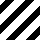

In [306]:
from selenium import webdriver
from bs4 import BeautifulSoup
import re
driver = webdriver.Chrome('./chromedriver')
driver.get('https://www.brandi.co.kr/products/19016965')
driver.implicitly_wait(3)
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')
print(soup)

In [307]:
img = list(set(soup.select('img[data-v-e6eb87de]')))
for n in img:
    print (n['src'])
    
print([n['src'] for n in img])

https://image.brandi.me/cproduct/2020/08/19/19016965_1597820196_image1_L.jpg
['https://image.brandi.me/cproduct/2020/08/19/19016965_1597820196_image1_L.jpg']


In [313]:
brandname = soup.select('a[data-v-c8060bfa]')[1].get_text()
print(brandname)

그룹리츠


In [309]:
brandsogae = soup.select('a[data-v-c8060bfa]')[2].get_text()
print(brandsogae)

안녕하세요 그룹리츠입니다.


In [314]:
title = soup.select_one('.detail_title').get_text()
print(title)

나이키_아이콘 퓨추라 숏슬리브 반팔티_AR5005-108


In [315]:
try:
    data = soup.select_one('.detail_price b').get_text()
    discountRate = int(re.findall(r'\d*',data)[0].replace('%',''))
except:
    discountRate = 0

print(discountRate)

73


In [319]:
try:
    data = soup.select_one('.detail_price span').get_text()
except:
    data = soup.select_one('.detail_price').get_text()
actualPrice = int(re.findall(r'\d*[,]\d*',data)[0].replace(',',''))
print(actualPrice)

69000


In [330]:
try :
    data = soup.select_one('.detail_purchase_count').get_text()
    try:
        Purchase_count = int(re.findall(r'\d*[,]\d*',data)[0].replace(',',''))
    except:
        Purchase_count = int(re.findall(r'\d*',data)[0])
except:
    Purchase_count = 0
print(Purchase_count)

0


In [65]:
delivery = soup.select_one('.detail_info_wrapper > span').get_text()[5:]
print(delivery)

브랜디 배송


In [66]:
option = soup.select('.detail_options option')
for i in option:
    print(i['value'])


소라
베이지


In [67]:
info_img = soup.select('#info_container_1 img')
for i in info_img:
    print(i['src'])

https://image.brandi.me/cproductdetail/2020/06/04/c78fc5a6cfd86b8096adaa2d64a9557f.jpeg
https://image.brandi.me/cproductdetail/2020/06/04/7670fb5591e45c8c706335e5b1af2420.jpeg
https://image.brandi.me/cproductdetail/2020/06/04/dc1b3efb92ec882769087a1710aaa394.jpeg
https://image.brandi.me/cproductdetail/2020/06/04/cbe5ba492d2d7f252efa5f5a2826431d.jpeg
https://image.brandi.me/cproductdetail/2020/06/04/0b68b48ee120a61a141f94c3ab63c4cd.jpeg
https://image.brandi.me/cproductdetail/2020/06/04/0db351502956d49b8ac54a77771d3d80.jpeg
https://image.brandi.me/cproductdetail/2020/06/04/cc5339057867fdabc07110e3405eda1e.jpeg
https://image.brandi.me/cproductdetail/2020/06/04/e903fcac48e293950095495378121a68.jpeg
https://image.brandi.me/cproductdetail/2020/06/04/59680e3edf70fb0a8e6f8c1a9cd567ff.jpeg
https://image.brandi.me/cproductdetail/2020/06/04/36219f03bf8777fdfad9af0fb4de89a8.jpeg
https://image.brandi.me/cproductdetail/2020/06/04/3c78e5b53d4d643cd6f77b32ef1e5304.jpeg
https://image.brandi.me/cproduct

In [136]:
textdic = {}
info_text = [i for i in soup.select_one('#info_container_1').get_text().splitlines() if i]
for i in info_text:
    if i == '\xa0' or i == '\u200b':
        i = ' '
    textdic['comment'] = textdic.get('comment','') + i
print(textdic)

{'comment': '  comment,  소매 롤업 디테일로 캐주얼한 포인트를 준티셔츠 아이템을 소개 해드려요:) 베이직한 듯 어깨를 자연스럽게 덮어주는반팔 소매 디자인에 고정된 롤업포인트로 밋밋한 기본 티셔츠들과의확실히 차별화된 디테일을 살려주었어요~ 제일 기본템 컬러들로 구성해가볍게 데일리하게 코디하기에도 부담없구요,기본 데님팬츠는 물론 숏팬츠린넨팬츠 와 함께 매칭해도 너무 이쁘답니다. 베이직한 기본아이템으로멋스럽게 연출하시기 좋아추천해드려요~ ෆ     , color블랙, 화이트, 다크그레이 , sizeFREE(44-66) 총장57 어깨40 가슴44 암홀20 소매14 소매밑단17 밑단47 , model162cm / 44반size / 25size (S사이즈)  , fabric면, 모달신축성 : 좋음 / 비침 : 약간세탁법 - 드라이크리닝 *상세 이미지로 사이즈와 소재감을 확인해 주세요.괄호안은 추천사이즈 입니다. 체형에 따라 상이할수 있습니다.  상품이 마음에 드신다면 꼭 찜 부탁드려용    , 화이트              , 다크그레이        , detail view         PRODUCT INFO(단면/CM)사이즈총장목어깨가슴소매길이소매암홀밑단free570404414172047신축성좋음보통없음비침없음약간있음촉감부드러움보통까실함핏감타이트정사이즈루즈두께감도톰보통얇음'}


In [141]:
info_text = soup.select_one('#info_container_1').get_text().replace('\n', '')
print(info_text)

​​comment,​​소매 롤업 디테일로 캐주얼한 포인트를 준티셔츠 아이템을 소개 해드려요:)​베이직한 듯 어깨를 자연스럽게 덮어주는반팔 소매 디자인에 고정된 롤업포인트로 밋밋한 기본 티셔츠들과의확실히 차별화된 디테일을 살려주었어요~​제일 기본템 컬러들로 구성해가볍게 데일리하게 코디하기에도 부담없구요,기본 데님팬츠는 물론 숏팬츠린넨팬츠 와 함께 매칭해도 너무 이쁘답니다.​베이직한 기본아이템으로멋스럽게 연출하시기 좋아추천해드려요~​ෆ ​  ​, color블랙, 화이트, 다크그레이​, sizeFREE(44-66)​총장57 어깨40 가슴44 암홀20 소매14 소매밑단17 밑단47​, model162cm / 44반size / 25size (S사이즈)​​, fabric면, 모달신축성 : 좋음 / 비침 : 약간세탁법 - 드라이크리닝​*상세 이미지로 사이즈와 소재감을 확인해 주세요.괄호안은 추천사이즈 입니다. 체형에 따라 상이할수 있습니다.​​상품이 마음에 드신다면 꼭 찜 부탁드려용 ​ ​, 화이트​​​​​​​​​​​​​​, 다크그레이​​​​​​ ​, detail view​​​​​​​​​PRODUCT INFO(단면/CM)사이즈총장목어깨가슴소매길이소매암홀밑단free570404414172047신축성좋음보통없음비침없음약간있음촉감부드러움보통까실함핏감타이트정사이즈루즈두께감도톰보통얇음


In [283]:
# from selenium.webdriver.common.keys import Keys

button = driver.find_element_by_xpath(f'//div[@class="tab_default"][3]')
driver.execute_script("arguments[0].click();", button)
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

In [284]:
name = soup.select('#store-info td')[1].get_text()
print(name)

주식회사 브랜디


In [275]:
humanname = soup.select('#store-info td')[3].get_text()
print(humanname)

최명식


In [276]:
num = soup.select('#store-info td')[5].get_text()
print(num)

739-08-01423


In [277]:
num = soup.select('#store-info td')[7].get_text()
print(num)

2019-충북충주-249


In [278]:
num = soup.select('#store-info td')[9].get_text()
print(num)

27428 ) 충북 충주시 중원대로 3464 (문화동)2층


In [279]:
name = soup.select('#seller-order-info td')[0].get_text()
print(name)

주중 10:00 AM ~ 6:00 PM, 주말 및 공휴일 휴무 이메일 : audtlr0109@gmail.com 전화번호 : 010-3624-8165 카톡문의 : audtlr0109


In [289]:
if soup.select('#seller-order-info th')[1].get_text() == '모델 사이즈 정보':
    name = soup.select('#seller-order-info td')[1].get_text()
print(name)

키 : 162cm상의 사이즈 : 55하의 사이즈 : 26발 사이즈 : 230mm


In [288]:
name = soup.select('#seller-order-info td')[2].get_text()
print(name)

브랜디배송 고객센터 운영시간일반배송 - 10시 ~ 17시하루배송 - 10시 ~ 22시18시 이후에는 하루배송 문의만 가능합니다.주말, 공휴일 휴무 /점심시간 12시30분~13시30분 /저녁시간 17시~18시<일반배송>택배사는 우체국 택배를 이용하고 있습니다.도서산간 지역의 배송비 추가는 별도로 없습니다.결제 후 평균 2~5일 소요될 수 있으며(주말, 공휴일 제외) 거래처 상황에 따라 변동될 수 있습니다.주문 급증, 인기 상품의 경우 기본 배송기간 이상 소요될 수 있는 점 양해 부탁드립니다.기본 배송일 이상 혹은 품절된 상품은 개별 연락 (알림톡, 문자) 드리고 있습니다.대체 옵션이 없는 품절 상품은 빠른 처리를 도와드리기 위해 알림톡 연락 후 주문 취소 처리를 진행해드리고 있습니다.<하루배송>새벽 도착/저녁 도착은 협력업체를 이용하고 있습니다.배송지가 서울인 경우 하루배송 상품 2개 이상 주문 시 새벽 도착/저녁 도착 서비스 이용 가능합니다.서울이 아닐 경우 최대 2,000포인트 적립 가능하며 오후 2시 이전 결제 완료해 주시면 당일 출고 가능합니다!▷새벽 도착당일 오전 8시~오후 8시59분 결제 시 다음날 오전 7시까지 도착 보장▷저녁 도착전일 오후 9시~당일 오전 7시59분 결제 시 당일 오후 8시까지 도착 보장배송 과정에서 특이사항 발생될 경우 알림톡 전송 도와드리고 있습니다.


In [265]:
name = soup.select('#seller-order-info td')[3].get_text()
print(name)

상품가치가 현저히 훼손된 경우를 제외한 모든 사유에 대해 환불이 가능합니다.환불요청 가능 기간은 상품 수령 후(배송완료 시점으로부터) 7일 이내입니다.교환/환불이 발생하는 경우 그 원인을 제공한 자가 배송비를 부담합니다.  - 고객변심 : 최초 배송비+반품 배송비+(교환의 경우) 교환 배송비는 고객이 부담  - 판매자귀책 : 최초 배송비+반품 배송비+(교환의 경우) 교환 배송비는 판매자가 부담다음의 경우는 예외적으로 교환 및 환불이 불가능합니다.  - 상품가치가 소비자의 귀책사유로 인해 현저하게 감소한 경우  - 소비자 과실로 인한 옷의 변색(예 : 착색, 화장품, 오염 등)  - 착용으로 인한 니트류 상품의 늘어남 발생 및 가죽 제품의 주름 발생  - 기타 착용 흔적 : 택 제거 등  - 구매확정된 주문의 경우  - 귀금속류의 경우는 소비자분쟁조정기준에 의거 교환만 가능합니다.      (단, 함량미달의 경우에는 환불이 가능함)브랜디배송 제품은 환불 요청 접수 후 평일 기준 1~3일 내로 자동 회수 접수 및 기사님의 회수 방문이 진행됩니다.판매자배송 제품과 합반품은 불가능하며 배송비 부담 후 반송될 수 있습니다.교환/반품 신청 후 장기간(2주 이상) 상품이 저희 측에 도착하지 않을 경우 처리가 어려울 수 있습니다.[단순 변심]단순 변심의 교환이나 반품의 경우 왕복 택배비(5,000원)를 아래의 계좌로 입금해 주셔야 합니다.[계좌 정보 :입금 계좌 : 022-105089-04-069 기업은행 / 주식회사 브랜디]*택배비 입금 시 성함과 휴대폰 뒷자리를(4자리)(ex-홍길동 5349) 입력하시면 더 빠른 처리가 가능합니다.상품의 하자 및 오배송으로 인한 교환/반품의 경우는 택배비가 발생되지 않습니다.상품 하자가 있는 경우에는 상품을 공급받은 날부터 3개월 이내로서, 그 사실을 안 날 또는 알 수 있었던 날부터 30일 이내 청약철회가 가능합니다.비키니/속옷 상품 반품 시, 상품에 부착 되어 있는 위생테이프 제거 시 반품 불가합니다.상의 상품 반품 시, 캡 미동봉시

In [266]:
name = soup.select('#seller-order-info td')[4].get_text()
print(name)

상품상세 참조


<html lang="ko"><head><meta charset="utf-8"/><title>브랜디 - 여성 전문 쇼핑앱</title><meta content="width=device-width,initial-scale=1,minimum-scale=1,maximum-scale=3" name="viewport"/><meta content="오직 예쁜 옷만 모으다! 여성의류 쇼핑몰, 블로그마켓, 스트릿, 디자이너 브랜드 편집샵" name="description" property="description"/><meta content="브랜디 - 여성 전문 쇼핑앱" name="og:title" property="og:title"/><meta content="오직 예쁜 옷만 모으다! 여성의류 쇼핑몰, 블로그마켓, 스트릿, 디자이너 브랜드 편집샵" name="og:description" property="og:description"/><meta content="https://www.brandi.co.kr/static/3.49.1/images/og-brandi.jpg" name="og:image" property="og:image"/><meta content="브랜디" name="al:ios:app_name" property="al:ios:app_name"/><meta content="1005442353" name="al:ios:app_store_id" property="al:ios:app_store_id"/><meta content="brandiapplication://applink" name="al:ios:url" property="al:ios:url"/><meta content="브랜디" name="al:android:app_name" property="al:android:app_name"/><meta content="com.brandicorp.brandi3" name="al:android:package" property="al:android:package"/><met
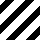

In [327]:
from selenium import webdriver
from bs4 import BeautifulSoup
import re
driver = webdriver.Chrome('./chromedriver')
driver.get('https://www.brandi.co.kr/products/18639957')
driver.implicitly_wait(7)
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')
print(soup)

In [331]:
data = {}
#메인 이미지 +++++++++++++++이미지 리사이징 필요
img = list(set(soup.select('img[data-v-e6eb87de]')))
data['main_img'] = [n['src'] for n in img]
#브랜드 이름
data['brandname'] = soup.select('a[data-v-c8060bfa]')[1].get_text()
#브랜드 소개
data['intro'] = soup.select('a[data-v-c8060bfa]')[2].get_text()
#제품 이름
data['name'] = soup.select_one('.detail_title').get_text()
#제품 가격
try:
    var = soup.select_one('.detail_price span').get_text()
except:
    var = soup.select_one('.detail_price').get_text()
data['price'] = int(re.findall(r'\d*[,]\d*',var)[0].replace(',',''))
#할인율
try:
    var = soup.select_one('.detail_price b').get_text()
    data['discount_rate'] = int(re.findall(r'\d*',var)[0].replace('%',''))/100
except:
    data['discount_rate'] = 0
#판매량
try :
    var = soup.select_one('.detail_purchase_count').get_text()
    try:
        Purchase_count = int(re.findall(r'\d*[,]\d*',var)[0].replace(',',''))
    except:
        Purchase_count = int(re.findall(r'\d*',var)[0])
except:
    Purchase_count = 0
#배송정보
data['delivery'] = soup.select_one('.detail_info_wrapper > span').get_text()[5:]

#product_detail
data['detail'] = soup.select_one('#info_container_1').get_text().replace('\n', '')

#product_detail_img
img = soup.select('#info_container_1 img')
data['info_img'] = [n['src'] for n in img]

#주문정보로 스왑
button = driver.find_element_by_xpath(f'//div[@class="tab_default"][3]')
driver.execute_script("arguments[0].click();", button)
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

#스토어정보
store_info = soup.select('#store-info td')
#주문정보
selling_info = soup.select('#seller-order-info td')
#상호명이 브랜디이면 모델사이즈 제외 전부 기본값
company_name = store_info[1].get_text()

if company_name == '주식회사 브랜디':
    if soup.select('#seller-order-info th')[1].get_text() == '모델 사이즈 정보':
        data['model_size'] = selling_info[1].get_text()

else:
    data['company_name'] = company_name
    #대표자
    data['representative'] = store_info[3].get_text()
    #사업자등록번호
    data['license_num'] = store_info[5].get_text()
    #통신판매업번호
    data['mail_order_num'] = store_info[7].get_text()
    #사업장소재지
    data['biz_location'] = store_info[9].get_text()


    n = 0
    #스토어 고객센터
    data['biz_location'] = selling_info[n].get_text()
    n+=1
    #모델사이즈 정보 // 없으면 스킵
    if soup.select('#seller-order-info th')[1].get_text() == '모델 사이즈 정보':
        data['model_size'] = selling_info[n].get_text()
        n+=1
    #배송정보
    data['shipping_info'] = selling_info[n].get_text()
    n+=1
    #교환/환불정보
    data['exchange_refund_info'] = selling_info[n].get_text()
    n+=1
    #상품정보 고시
    var = selling_info[n].get_text()
    if var == '상품상세 참조':
        pass
    else:
        data['product_notice'] = var
        
print(data)

{'main_img': ['https://image.brandi.me/cproduct/2020/07/30/18639957_1596082556_image1_L.jpg'], 'brandname': '반반한샵', 'intro': '#20대 #여성캐쥬얼 #데일리룩 #러블리데이트룩 :D', 'name': '리타-진주린넨b', 'price': 15900, 'discount_rate': 0, 'delivery': '판매자 배송', 'detail': '', 'info_img': ['http://banbanhan.shop/web/product/detail/201-0019.jpg'], 'company_name': '주식회사 라헬샵', 'representative': '전유미', 'license_num': '492-87-01441', 'mail_order_num': '2020-인천계양-0769호', 'biz_location': '주중 11:00 AM ~ 4:00 PM, 주말 및 공휴일 휴무 이메일 : yumijoa@naver.com 전화번호 : 010-4109-9901 카톡문의 : banbanhanshop', 'model_size': '키 : 163cm상의 사이즈 : 55하의 사이즈 : 26발 사이즈 : 235mm', 'shipping_info': '배송은 1-5일 소요됩니다 순차적발송드립니다 도서산간은 추가요금이 발생합니다', 'exchange_refund_info': '상품가치가 현저히 훼손된 경우를 제외한 모든 사유에 대해 환불이 가능합니다.환불요청 가능 기간은 상품 수령 후(배송완료 시점으로부터) 7일 이내입니다.교환/환불이 발생하는 경우 그 원인을 제공한 자가 배송비를 부담합니다.  - 고객변심 : 최초 배송비+반품 배송비+(교환의 경우) 교환 배송비는 고객이 부담  - 판매자귀책 : 최초 배송비+반품 배송비+(교환의 경우) 교환 배송비는 판매자가 부담다음의 경우는 예외적으로 교환 및 환불이 불가능합니다.  - 상품가치가 소비자의 귀책사유로 인해 현저하게 감소한 경우  

In [321]:
dic = {}

dic['a'] = 34
print(dic)

{'a': 34}
